In [1]:
import numpy as np
import pandas as pd
from ase.data import atomic_numbers
import matplotlib.pyplot as plt

In [2]:
df_salex = np.load('edge_info/salex.npy', mmap_mode='r')
df_salex = pd.DataFrame.from_records(df_salex)
df_salex.head()

,dataset_index,edge_index_src,edge_index_dst,atomic_numbers,oxygen_distance
0,267,0,4,40,4.746094
1,267,0,5,40,5.332031
2,267,0,4,40,4.746094
3,267,0,5,40,4.187500
4,267,0,5,40,5.332031


In [3]:
u_elements = ['Co', 'Cr', 'Fe', 'Mn', 'Mo', 'Ni', 'V', 'W']
u_numbers = [atomic_numbers[element] for element in u_elements]

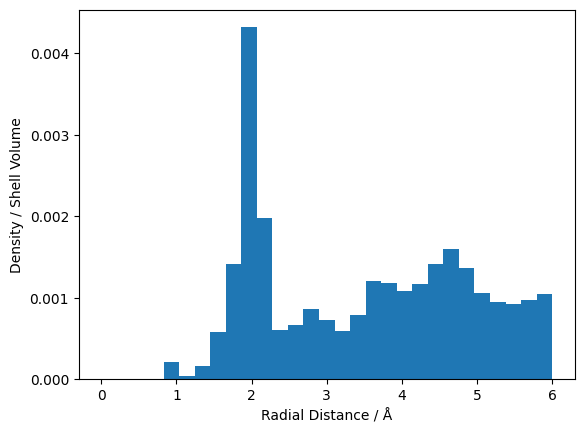

In [4]:
def plot_oxygen_distance_hist(df, numbers, ax=None, bins=30, radial_normalization=True, density=True):
    distances = df.oxygen_distance[np.isin(df, numbers).any(axis=1)]

    if ax is None:
        fig, ax = plt.subplots()

    counts, bin_edges = np.histogram(distances, np.linspace(0, 6, bins), density=density)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    bin_width = bin_edges[1] - bin_edges[0]
    
    if radial_normalization:
        ax.bar(bin_centers, counts/(4*np.pi*bin_centers**2), width=bin_width)
    else:
        ax.bar(bin_centers, counts, width=bin_width)

    ylabel = 'Density' if density else 'Count'
    if radial_normalization: ylabel += ' / Shell Volume'
    ax.set_xlabel('Radial Distance / Å')
    ax.set_ylabel(ylabel)

plot_oxygen_distance_hist(df_salex, u_numbers)